In [19]:
%matplotlib inline
import os, json
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"
from glob import glob
import numpy as np
from imp import reload
np.set_printoptions(precision=4, linewidth=100)
import matplotlib.pyplot as plt
import utils; reload(utils)
from utils import plots

PATH = os.getcwd() + "/dogscats/sample/"

In [20]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=4
# Import our class, and instantiate
from vgg16 import Vgg16# Import our class, and instantiate
from vgg16 import Vgg16
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(PATH + "train", batch_size=batch_size)
val_batches = vgg.get_batches(PATH + "valid", batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/1
160/160 [==============================] - 103s - loss: 1.1927 - acc: 0.7500 - val_loss: 0.3383 - val_acc: 0.9500


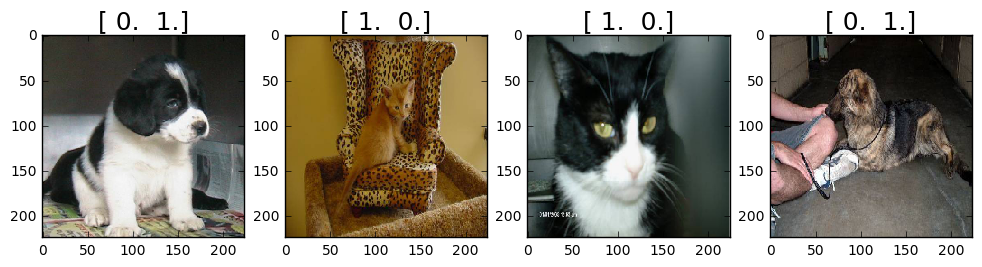

In [29]:
imgs,labels = next(batches)
plots(imgs, titles=labels)